In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
from sklearn.metrics import r2_score
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import os

In [2]:
os.chdir ("C:\\Users\\Nilesh\Documents\\GitHub\\Machine-Learning\\")
df = pd.read_csv("SVM_Data.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [4]:
 df_X = df.iloc[:,:-1]
 df_Y = df.iloc[:,-1]  

In [5]:
df_X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [6]:
df_Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [7]:
scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X),columns=df_X.columns)

In [18]:
X=df_X_scaled
Y=df_Y

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.7,shuffle=True,random_state=0)

In [13]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
svm = svm.SVC(kernel='poly') 
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[76  3]
 [16 25]]
Accuracy by confusion matrix: 0.8416666666666667


                  precision    recall  f1-score   support

without diabetes       0.83      0.96      0.89        79
   with diabetes       0.89      0.61      0.72        41

        accuracy                           0.84       120
       macro avg       0.86      0.79      0.81       120
    weighted avg       0.85      0.84      0.83       120

----------------------------------------------------------------------


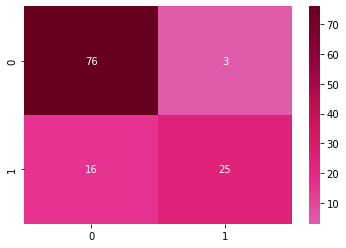

In [14]:
dataplot = sns.heatmap(confusion_matrix, cmap='PuRd', annot=True, center=0)

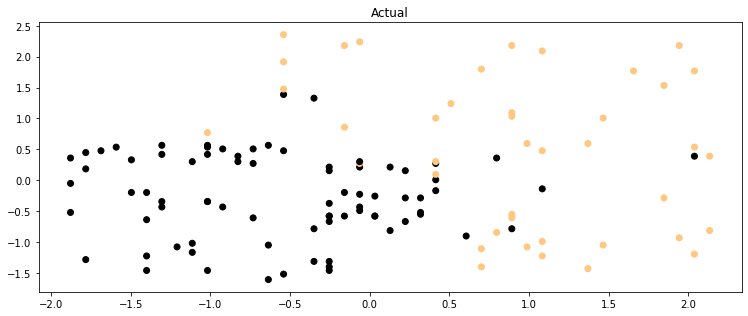

In [31]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True 
plt.title("Actual")
plt.scatter(cmap = 'copper',x=X_test['Age'],y=X_test['EstimatedSalary'],c=Y_test)
plt.show()

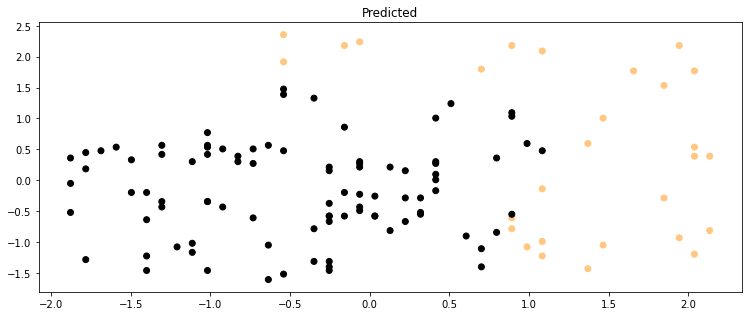

In [32]:
plt.title("Predicted")
plt.scatter(cmap = 'copper',x=X_test['Age'],y=X_test['EstimatedSalary'],c=Y_pred)
plt.show()